<a href="https://colab.research.google.com/github/zenilist/DataAnalytics/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Group members**

* Yuhang Zhu
* Jason Kang
* Aviraj Kar
* Roseleen Kaur
* Hema Muni

#**Abstract**

We will use a soccer dataset based on transfer evaluations for the last 12 years to look for features that determine a players valuation. We will load the data from [github](https://github.com/d2ski). Perform data preparation to fill in values and perform the EDA work to analyze the data and gain valuable insights about relationships concerning our attributes. We plan to use four different classifiers one being an ensemble method to model a binary response variable, "is_expensive" that could be used by the UEFA transfer regulatory board to create a threashold to deter massive clubs like PSG, Barcelona FC, Manchester United to name a few, from buying too many excellent players with their significantly large buying power. As a result it would level the playing field and make it more viable for smaller clubs to approach talented footballers.

#**Introduction**

Soccer or otherwise known as football is a team sport played amongst 11 players where two teams try to kick the ball into the opposing team’s goal to score goals. There are 10 outfield players and 1 pers on designated as the goalkeeper.


In this sport, the pro athletes are the ones that shine the most. Hosting one of the most well-known names in all sports such as Lionel Messi or Cristiano Ronaldo it is no surprise that these players are worth a large sum of money and that soccer itself is a booming industry. The transfer market of soccer has increased tremendously over the last decade [link](https://football-observatory.com/Monthly-Report-reveals-growing-football-transfer) going from 1.5 billion euros in 2010 to 6.6 billion in 2019.

**Our model that predicts if a player is expensive or not could be used by the UEFA transfer regulatory board to create a threashold to deter massive clubs like PSG, Barcelona FC, Manchester United to name a few, from buying too many excellent players with their significantly large buying power. As a result it would level the playing field and make it more viable for smaller clubs to approach talented footballers.**

#**Research Question**

The answer we want to find by analysing this data set is are the English players more valued compared to players from other European countries.


#**Research Approach**

After the data is loaded from github we will run various graphs using the python libraries matplotlib.pyplot, seaborn and missingno to answer our research question and make our data ready for modeling work. We will also use python pandas features like group-by to get multivariate analysis for attributes that are worth talking about.

#**Attribute Summary**




| Attribute Name       | Attribute Description                                  |
|----------------------|--------------------------------------------------------|
| *league*           | codename of the football league                        |
| *season*               | year of transfer                                       |
| *window*               | transfer window - s(summer), w(winter)                 |
| *team_id*              | team id that was scraped from Transfermarkt            |
| *team_name*            | name of the buying team                                |
| *team_country*         | buying team's nation                                   |
| *dir*                  | direction of transfer(in or left)                      |
| *player_id*            | player's ID as used by Transfermarkt                   |
| *player_name*          | name of the player                                     |
| *player_age*           | age of player when the transfer took place             |
| *player_nation*        | player's nationality                                   |
| *player_nation2*       | player's second nationality                            |
| *player_pos*           | position of player                                     |
| *counter_team_id*      | selling team's id as used by Transfermarkt             |
| *counter_team_name*    | selling team's name                                    |
| *counter_team_country* | selling team's nation                                  |
| *transfer_fee_amnt*    | amount of transfer fee in Euros                        |
| *market_val_amnt*      | player's market value in Euros at the time of transfer |
| *is_free*              | was the transfer a free one                            |
| *is_loan*              | loan transfer (yes/no)                                 |
| *is_loan_end*          | end of loan transfer (yes/no)                          |
| *is_retired*          | is the player retired (yes/no)                         |
| *transfer_id*          | transfer id used by Transfermarkt                      |

**Types of Leagues**
* GB1 - ENGLISH PREMIER LEAGUE
* ES1 - LA LIGA
* IT1 - SERIE A
* L1 - BUNDESLIGA
* FR1 - FRENCH LIGUE 1
* PO1 - LIGA PORTUGAL BWIN
* NL1 - DUTCH EREDIVISIE

**Types of player postions:**
  * RB - Right Back
  * CF - Centre Forward
  * AM - Attacking Midfielder
  * CB - Center Back
  * CM - Central Midfield
  * GK - Goalkeeper
  * LW - Left Winger
  * LB - Left Back
  * DM - Defensive Midfielder
  * SS - Second Striker
  * RW - Right Winger
  * RM - Right Midfielder
  * LM - Left Midfielder
  * RM - Right Midfielder
  * Midfield
  * Attack
  * Defence

#**Data Loading**

In [1]:
# import libraries and read the data from Github link
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
pd.set_option('display.max_columns', 500)
# read the data from github 
df = pd.read_csv(
    'https://raw.githubusercontent.com/d2ski/football-transfers-data/main/dataset/transfers.csv')
# create a copy in case
df_cp = df.copy()
# display the data frame
df.head()


,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,player_nation,player_nation2,player_pos,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
0,GB1,2009,s,985,Manchester United,England,in,33544,Antonio Valencia,23.0,Ecuador,NaN,RB,1071,Wigan Athletic,England,18800000.0,NaN,False,False,False,False,310832
1,GB1,2009,s,985,Manchester United,England,in,62049,Mame Diouf,21.0,Senegal,NaN,CF,687,Molde FK,Norway,4500000.0,1600000.0,False,False,False,False,319841
2,GB1,2009,s,985,Manchester United,England,in,43261,Gabriel Obertan,20.0,France,Guadeloupe,AM,40,FC Girondins Bordeaux,France,4000000.0,400000.0,False,False,False,False,315185
3,GB1,2009,s,985,Manchester United,England,in,1397,Michael Owen,29.0,England,NaN,CF,762,Newcastle United,England,0.0,NaN,True,False,False,False,306421
4,GB1,2009,s,985,Manchester United,England,in,73538,Scott Moffatt,18.0,England,NaN,CB,5242,Manchester United U18,England,NaN,NaN,False,False,False,False,339015


In [ ]:
# to see how many rows and cols in this data set
df.shape

(70006, 23)

The rows indicate 70,006 unique transfers over the course of 12 years(2009-2021).  

In [ ]:
# Check the data type of each column.
df.dtypes

league                   object
season                    int64
window                   object
team_id                   int64
team_name                object
team_country             object
dir                      object
player_id                 int64
player_name              object
player_age              float64
player_nation            object
player_nation2           object
player_pos               object
counter_team_id          object
counter_team_name        object
counter_team_country     object
transfer_fee_amnt       float64
market_val_amnt         float64
is_free                    bool
is_loan                    bool
is_loan_end                bool
is_retired                 bool
transfer_id               int64
dtype: object

There is a mix of mostly categorical and some numeric datas in this dataset.

#**Data Preparation**

In [ ]:
# Check if there is a missing value in each column.
df.isnull().sum()

league                      0
season                      0
window                      0
team_id                     0
team_name                   0
team_country                0
dir                         0
player_id                   0
player_name                 0
player_age                 16
player_nation               5
player_nation2          46825
player_pos                  0
counter_team_id             0
counter_team_name           0
counter_team_country        0
transfer_fee_amnt       41743
market_val_amnt         19264
is_free                     0
is_loan                     0
is_loan_end                 0
is_retired                  0
transfer_id                 0
dtype: int64

There are lots of missing values in for actual transfer fee, market value of players and player nation2. We might be better of if we drop the column for nation 2 since majority of the players represent only one nation(their primary nationality).

In [2]:
# Drop player nation2 column since our domain expertise is telling us that the secondary nationality of the players would not be a key indicator to their valuation
df.drop('player_nation2',axis=1,inplace=True)


In [ ]:
# Check how many unique values are in each column.
df.nunique()

league                      7
season                     13
window                      2
team_id                   239
team_name                 243
team_country                7
dir                         2
player_id               17580
player_name             17103
player_age                 33
player_nation             168
player_pos                 16
counter_team_id          3359
counter_team_name        3610
counter_team_country      125
transfer_fee_amnt         796
market_val_amnt           137
is_free                     2
is_loan                     2
is_loan_end                 2
is_retired                  2
transfer_id             58640
dtype: int64

There are lot's of unique values for player names and ids and as such they do not seem to be all that important as a feature to our model. Other than that, the values of all the attributes appear to be within normal range. No surprises here.

In [ ]:
df['is_free'].value_counts()

False    57036
True     12970
Name: is_free, dtype: int64

We checked if the huge number of null transfer fees are a result of free transfers. However there are only 12970 free transfers as opposed to over 41000 null transfer values. Using our domain knowledge we can explain why this is the case; in soccer there are many instances where the buyer club and player(or his agent) decide to not disclose their transfer fee resulting in a massive loss in valuable data. For our purposes we would use kNN imputation to fill in the unknown values. We recognize that another route might be to drop all the rows that have the NaN values for transfer fee. Moreover, since our target variable is heavily realiant on clean and precise transfer data, due to the imputation we might run into accuracy issues with our model.

In [ ]:
#check to see if there are any rows that have 
#Nan value for transfer fee and that are also free transfers.
val = df['transfer_fee_amnt'].tolist()
new_val = []
free = df['is_free'].tolist()
for val, free in zip(val,free):
    if free and val == np.nan:
        new_val.append(0)
    else:
        new_val.append(val)

In [ ]:
df['transfer_fee_amnt'] = new_val

In [ ]:
df.isnull().sum()

league                      0
season                      0
window                      0
team_id                     0
team_name                   0
team_country                0
dir                         0
player_id                   0
player_name                 0
player_age                 16
player_nation               5
player_pos                  0
counter_team_id             0
counter_team_name           0
counter_team_country        0
transfer_fee_amnt       41743
market_val_amnt         19264
is_free                     0
is_loan                     0
is_loan_end                 0
is_retired                  0
transfer_id                 0
dtype: int64

Unfortunately, our null values remain unchanged highlighting that all free transfers have been properly accounted for in the tranfer fee column.

In [ ]:
df.describe()

,season,team_id,player_id,player_age,transfer_fee_amnt,market_val_amnt,transfer_id
count,70006.000000,70006.000000,70006.000000,69990.000000,2.826300e+04,5.074200e+04,7.000600e+04
mean,2014.935934,1245.373725,161415.178285,24.165638,3.762225e+06,3.557931e+06,1.518057e+06
std,3.615246,2352.682228,143527.769212,7.845883,1.950388e+07,8.966048e+06,9.196246e+05
min,2009.000000,2.000000,6.000000,12.000000,0.000000e+00,1.000000e+04,6.845100e+04
25%,2012.000000,252.000000,50356.750000,21.000000,0.000000e+00,2.750000e+05,7.469312e+05
50%,2015.000000,607.000000,121990.000000,23.000000,2.000000e+05,7.000000e+05,1.293328e+06
75%,2018.000000,1123.000000,240341.000000,27.000000,2.500000e+06,2.500000e+06,2.198414e+06
max,2021.000000,23826.000000,936900.000000,1775.000000,5.500000e+08,1.600000e+08,3.633188e+06


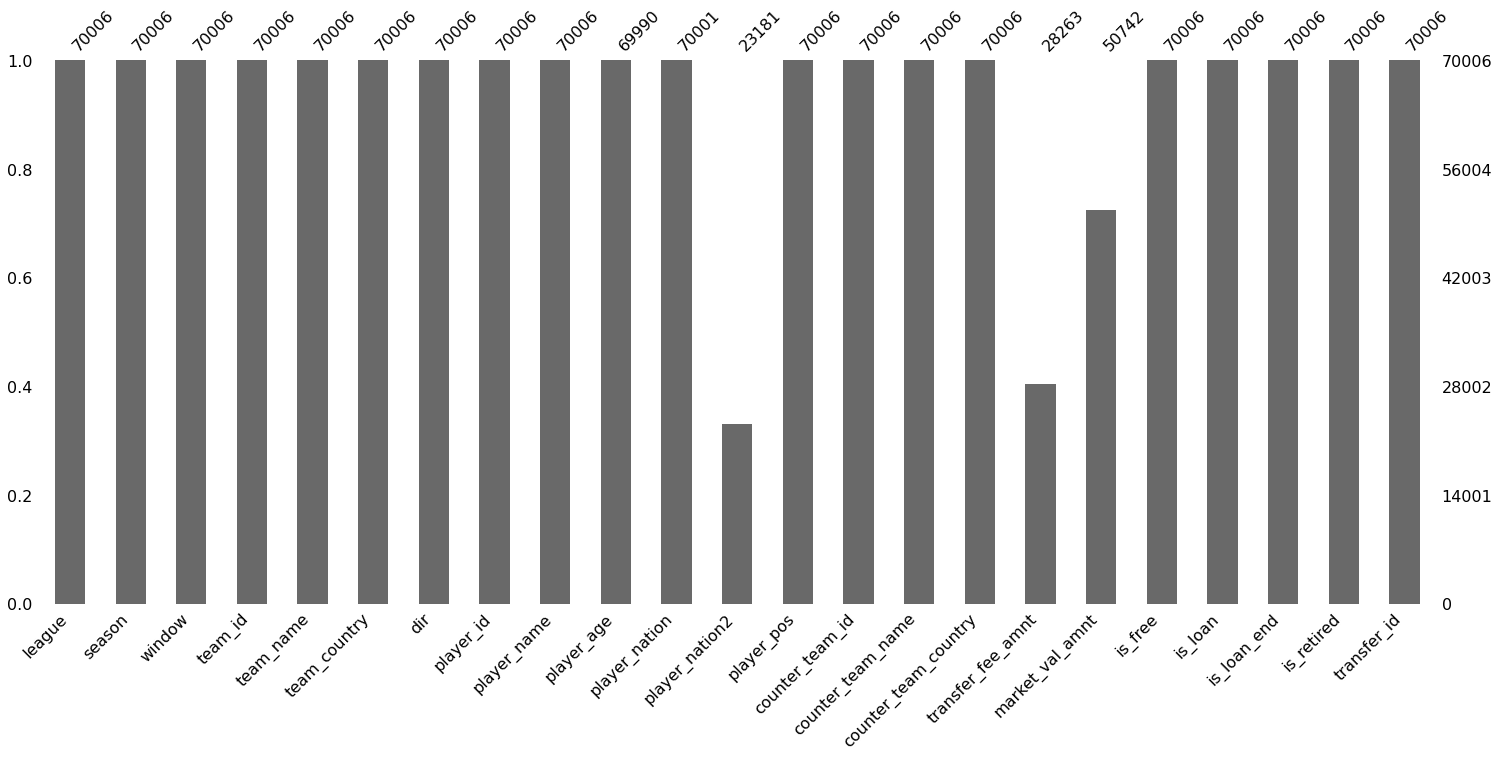

In [ ]:
# display null value of each column
msno.bar(df_cp)


In [3]:
#  separate numeric data and categorical data to perform data imputation
numerics = ['int64','float64']
numericdf = df.select_dtypes(include=numerics)
numericdf

,season,team_id,player_id,player_age,transfer_fee_amnt,market_val_amnt,transfer_id
0,2009,985,33544,23.0,18800000.0,NaN,310832
1,2009,985,62049,21.0,4500000.0,1600000.0,319841
2,2009,985,43261,20.0,4000000.0,400000.0,315185
3,2009,985,1397,29.0,0.0,NaN,306421
4,2009,985,73538,18.0,NaN,NaN,339015
...,...,...,...,...,...,...,...
70001,2021,306,257808,25.0,NaN,500000.0,3071862
70002,2021,306,580142,22.0,NaN,100000.0,3268245
70003,2021,468,340353,22.0,NaN,1000000.0,3619917
70004,2021,468,340353,22.0,7000000.0,1000000.0,3619916


In [4]:
# import knn imputer from sklearn library and perform knn imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(numericdf)
new_df = imputer.transform(numericdf)

In [6]:
# see dataframe after knn imputation
new_df = pd.DataFrame(new_df)
new_df


,0,1,2,3,4,5,6
0,2009.0,985.0,33544.0,23.0,18800000.0,450000.0,310832.0
1,2009.0,985.0,62049.0,21.0,4500000.0,1600000.0,319841.0
2,2009.0,985.0,43261.0,20.0,4000000.0,400000.0,315185.0
3,2009.0,985.0,1397.0,29.0,0.0,525000.0,306421.0
4,2009.0,985.0,73538.0,18.0,1020000.0,300000.0,339015.0
...,...,...,...,...,...,...,...
70001,2021.0,306.0,257808.0,25.0,4000.0,500000.0,3071862.0
70002,2021.0,306.0,580142.0,22.0,0.0,100000.0,3268245.0
70003,2021.0,468.0,340353.0,22.0,2860000.0,1000000.0,3619917.0
70004,2021.0,468.0,340353.0,22.0,7000000.0,1000000.0,3619916.0


In [7]:
# rename dataframe header
cols = ['season', 'team_id', 'player_id', 'player_age',
        'transfer_fee_amnt', 'market_val_amnt', 'transfer_id']
new_df.columns = cols
new_df

,season,team_id,player_id,player_age,transfer_fee_amnt,market_val_amnt,transfer_id
0,2009.0,985.0,33544.0,23.0,18800000.0,450000.0,310832.0
1,2009.0,985.0,62049.0,21.0,4500000.0,1600000.0,319841.0
2,2009.0,985.0,43261.0,20.0,4000000.0,400000.0,315185.0
3,2009.0,985.0,1397.0,29.0,0.0,525000.0,306421.0
4,2009.0,985.0,73538.0,18.0,1020000.0,300000.0,339015.0
...,...,...,...,...,...,...,...
70001,2021.0,306.0,257808.0,25.0,4000.0,500000.0,3071862.0
70002,2021.0,306.0,580142.0,22.0,0.0,100000.0,3268245.0
70003,2021.0,468.0,340353.0,22.0,2860000.0,1000000.0,3619917.0
70004,2021.0,468.0,340353.0,22.0,7000000.0,1000000.0,3619916.0


In [8]:
# replace old column value with new column value
cols = new_df.columns
for col in cols:
    df[col] = new_df[col]

In [9]:
# fill missing value in player nation column
df['player_nation'].fillna(method='bfill', inplace = True)
df['player_nation'].isnull().sum()

0

Create a new column is_expensive that would denote if a player's market value is greater or less than the mean. This would be our binary target variable which would be classified using different models.

In [10]:
# calculate means
mean = df['market_val_amnt'].mean()
print(mean)
# turn market val amount column into a list
list_mark = df['market_val_amnt'].tolist()
# create a list
res = []
# loop through market val amount column
# if value is above mean then append 1 (true)
# else append 0 (false)
for i in list_mark:
  if i < mean:
    res.append(0)
  else:
    res.append(1)

# turn that list into  panda dataframe
res = pd.DataFrame (res, columns = ['is_expensive'])
# create a new column in df
df['is_expensive'] = res

3037731.3801674144


In [11]:
# count 0 and 1 in is expensive column
df['is_expensive'].value_counts()

0    56893
1    13113
Name: is_expensive, dtype: int64

We see the that the distribution is highly unbalanced so we would need to use an alogirithm like SMOTE to even out the traning data.

In [ ]:
# check null for each column after data cleaning
# will ignore player_nation2 column because will drop that column
df.isnull().sum()

league                  0
season                  0
window                  0
team_id                 0
team_name               0
team_country            0
dir                     0
player_id               0
player_name             0
player_age              0
player_nation           0
player_pos              0
counter_team_id         0
counter_team_name       0
counter_team_country    0
transfer_fee_amnt       0
market_val_amnt         0
is_free                 0
is_loan                 0
is_loan_end             0
is_retired              0
transfer_id             0
is_expensive            0
dtype: int64

#**EDA and Prepped Data Analysis**

In [ ]:
#we take a look at the statistics of our numeric attributes
df.describe()

,season,team_id,player_id,player_age,transfer_fee_amnt,market_val_amnt,transfer_id,is_expensive
count,70006.000000,70006.000000,70006.000000,70006.000000,7.000600e+04,7.000600e+04,7.000600e+04,70006.000000
mean,2014.935934,1245.373725,161415.178285,24.165157,2.730297e+06,3.037731e+06,1.518057e+06,0.187313
std,3.615246,2352.682228,143527.769212,7.845120,1.435189e+07,7.945158e+06,9.196246e+05,0.390165
min,2009.000000,2.000000,6.000000,12.000000,0.000000e+00,1.000000e+04,6.845100e+04,0.000000
25%,2012.000000,252.000000,50356.750000,21.000000,0.000000e+00,2.600000e+05,7.469312e+05,0.000000
50%,2015.000000,607.000000,121990.000000,23.000000,3.000000e+05,6.100000e+05,1.293328e+06,0.000000
75%,2018.000000,1123.000000,240341.000000,27.000000,1.600000e+06,2.000000e+06,2.198414e+06,0.000000
max,2021.000000,23826.000000,936900.000000,1775.000000,5.500000e+08,1.600000e+08,3.633188e+06,1.000000


At first glamce, seeing min value of 0 for transfer free amount might seem wrong but using our domain expertise we know that when a player's contract runs out with his current club his transfer to a new club would be therefore a free transfer. There seem to be some data that are just plain wrong: such as max player age being 1775 and max transfer fee amount being 550million.

Using our domain knowledge, we know that the most expensive transfer in football history is of Neymar from Barcelona to PSG which costed 250million, and also we know that there are no players over the age of 50 playing soccer.

In [12]:
#df = df[df.player_age < 50]
#df = df[df.transfer_fee_amnt < 250000000]
#df[(df.player_age < 50) & (df.transfer_fee_amnt < 250000000.00000)]

df.drop(df.index[df['player_age'] > 50],axis=0, inplace = True)
df.drop(df.index[df['transfer_fee_amnt'] > 251000000],axis=0, inplace = True)


df.shape

(69970, 23)

In [ ]:
# create a function to set graph size
def graph_size(x = 12, y = 10):
  plt.figure(figsize = (x, y))
  

(array([11161.,  8704.,     0., 16100.,     0.,  7000.,  8199.,     0.,
        11377.,  7429.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

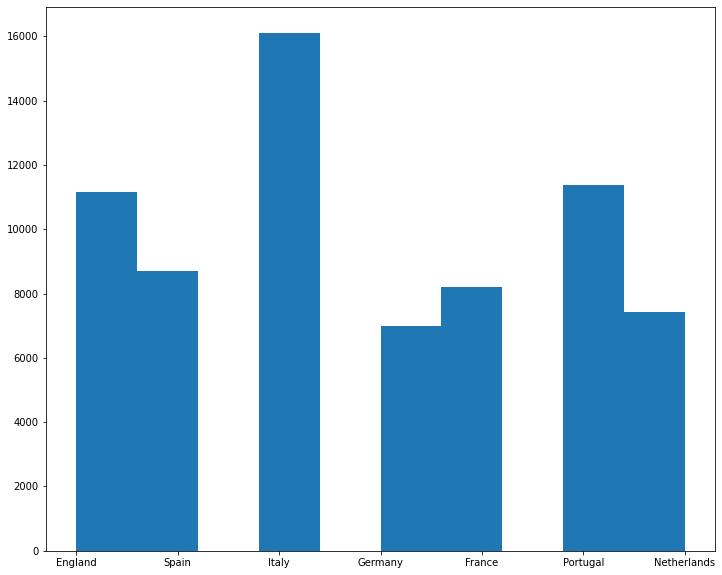

In [ ]:
# display how many players in each league
graph_size()
plt.hist(df['team_country'], bins=10)

The Italian league(SERIA A) cumulatively has made the most number of transfers, followed by portugal and england. German clubs in comparison has made the least transfers to it's league(Bundesliga) indicating that they are more keen on nurturing homegrown players and building a squad with them. 

<BarContainer object of 7 artists>

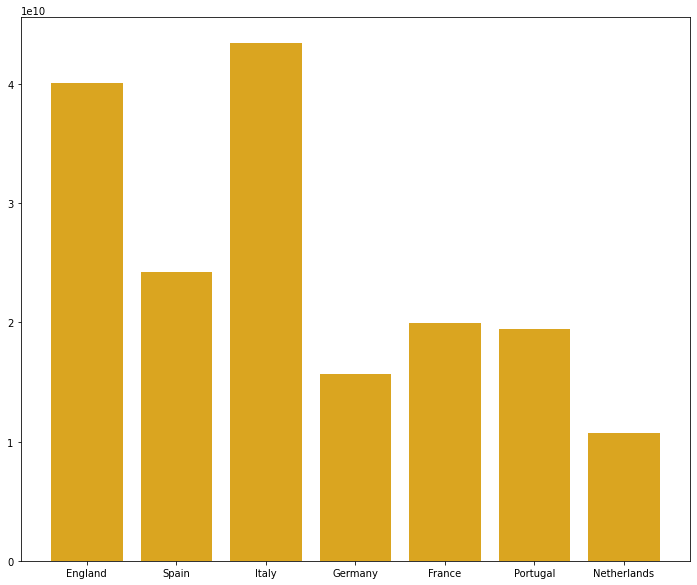

In [ ]:
# Display the total player transfer value of each coutry.
import collections
total = collections.defaultdict(int)
for player, country in zip(df['transfer_fee_amnt'].tolist(),df['team_country'].tolist()):
  total[country] += player

graph_size()
plt.bar(list(total.keys()),list(total.values()), color="goldenrod")

Italy has spent the most amount of money in transfer over the last 12 years but England stands out at spending more relative to number of players bought. 

In [ ]:

col = df['team_country'].unique()
mapping = collections.defaultdict(int)

play_na = df['player_nation'].tolist()
mark = df['market_val_amnt'].tolist()
for nation,val in zip(play_na,mark):
        if nation in col:
          mapping[nation] += val


In [ ]:
print(mapping)

defaultdict(<class 'int'>, {'France': 21145902000.0, 'England': 18384828000.0, 'Portugal': 16726628000.0, 'Italy': 20158310000.0, 'Spain': 19918525000.0, 'Netherlands': 10682678000.0, 'Germany': 10599030000.0})


<BarContainer object of 7 artists>

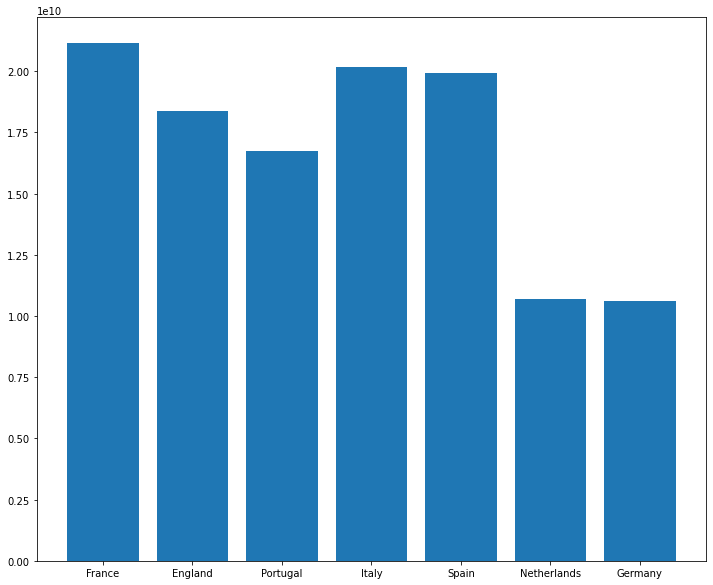

In [ ]:
graph_size()
plt.bar(list(mapping.keys()),list(mapping.values()))

So our original hypothesis seems to have been disproven as France is leading the way in total player valuation exceeding the likes of England. In second and third place are Italy and Spain respectively. This graph makes perfect sense since France won the FIFA World Cup in 2018, Italy won the Euros in 2020 and Spain were dominant till 2015. Therefore, it is in fact not quite accurate to say that England players on average are valued more than their European opponents.

<BarContainer object of 2 artists>

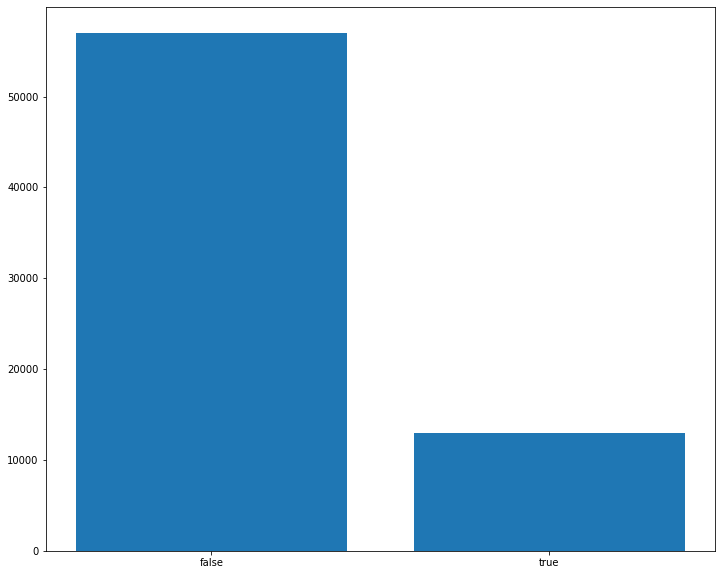

In [ ]:
# to see how many players had a free transfer
graph_size()
total = collections.defaultdict(int)
for val in df['is_free'].tolist():
  total[val] += 1
x = np.array(['false','true'])
y = np.array(list(total.values()))
plt.bar(x,y)

(array([16844.,  4700., 19698.,  6283.,  9329.,  5734.,  5766.,   729.,
          737.,   150.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

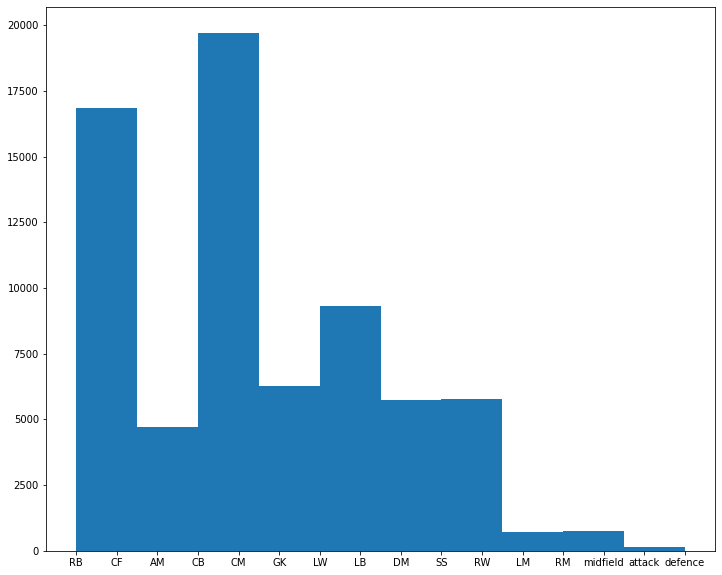

In [ ]:
# see how many players on each position
graph_size()
plt.hist(df['player_pos'])

The most sought after position in transfers are Center Midfielder. The inclusion of Right Back in second is definitely surprising. I would expect clubs going for forward positions like LW(left winger), RW(right winger) and CF(Center forward) more often. 

<BarContainer object of 13 artists>

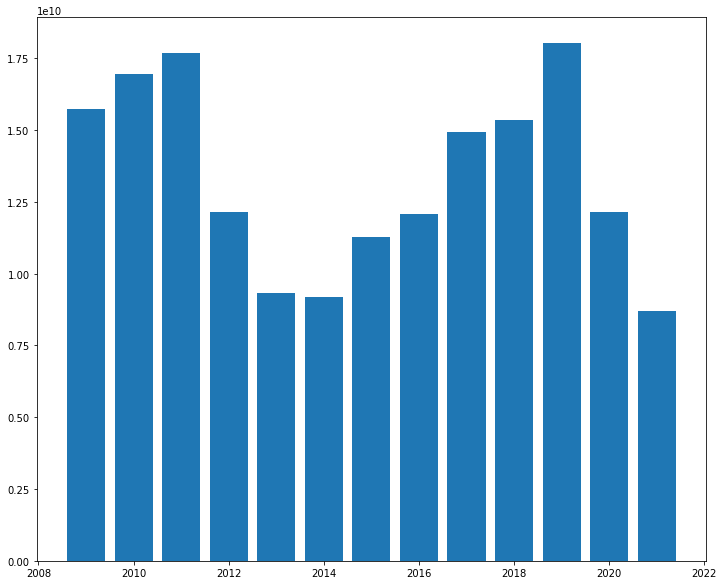

In [ ]:
# the total transfer value of seven leagues  each season

total = collections.defaultdict(int)

for sea,val in zip(df['season'].tolist(),df['transfer_fee_amnt'].tolist()):
  total[sea] += val

graph_size()
plt.bar(list(total.keys()),list(total.values()))

This is a very interesting trend showing the cumulative transfer fee was increasing during the 2009-2011 seasons but it slowly decreased for 3 seasons till bottoming out in 2014. It started to drop again after 2019 probably due to the outbreak of COVID which stopped play in many leagues for a couple months.

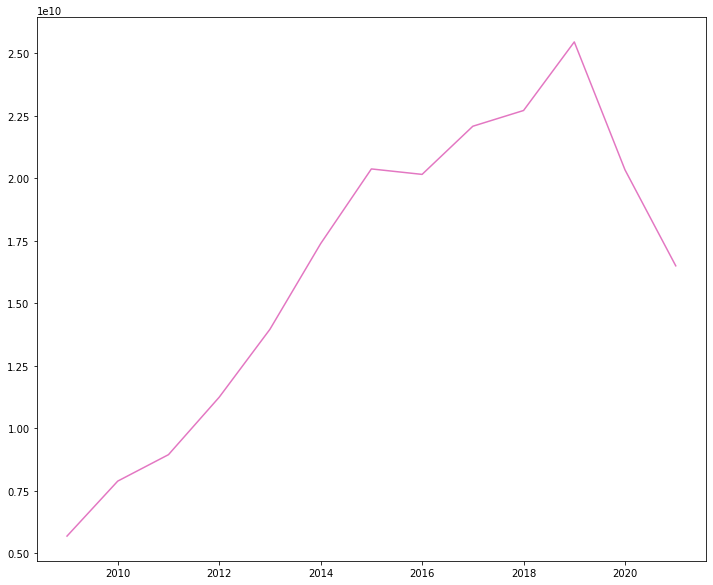

In [ ]:
# the total market value of seven leagues  each season

total = collections.defaultdict(int)

for sea,val in zip(df['season'].tolist(),df['market_val_amnt'].tolist()):
  total[sea] += val

graph_size()
# plt.bar(list(total.keys()),list(total.values()))
plt.plot(list(total.keys()),list(total.values()), color='#e377c2')

This trend line shows an inflationary trend in player valuation till covid hits when it starts to notice a drop.

(array([56859.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13111.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

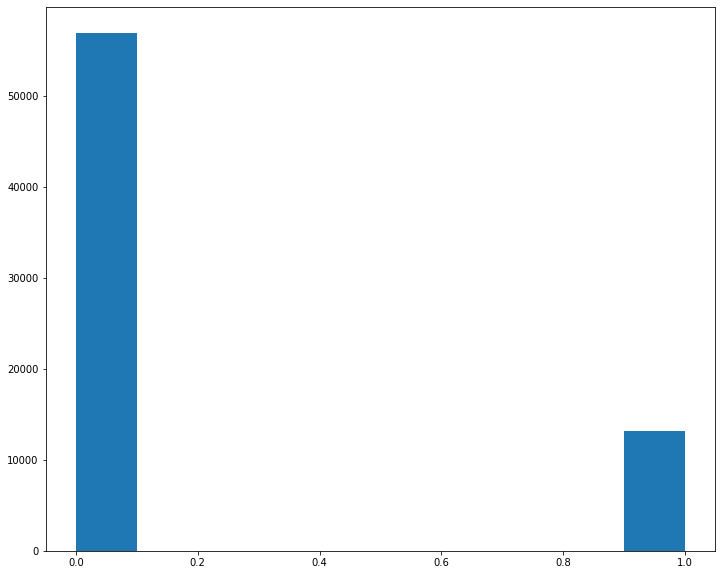

In [ ]:
# show if inexpensive player and expensive play distribution
graph_size()
plt.hist(df['is_expensive'])

{'boxes': [<matplotlib.lines.Line2D at 0x7eff374ea990>],
 'caps': [<matplotlib.lines.Line2D at 0x7eff374ed990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7eff374f39d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7eff374f3490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7eff374eaed0>,
  <matplotlib.lines.Line2D at 0x7eff374ed450>]}

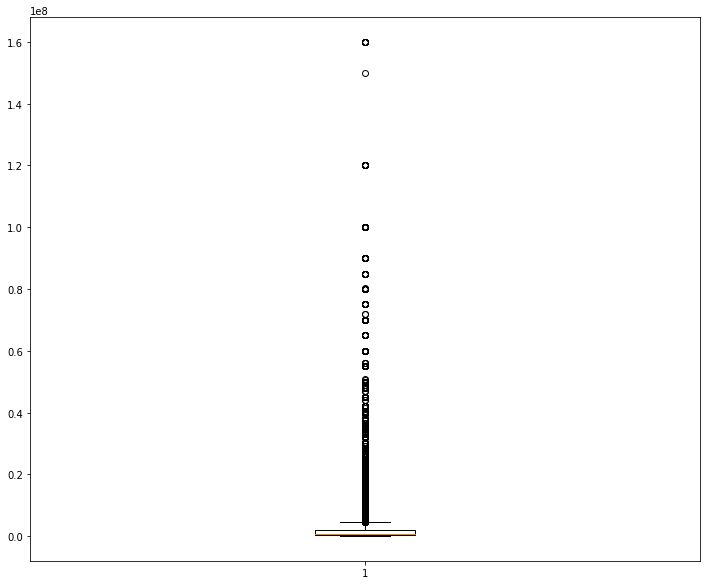

In [ ]:
# boxplot for market value

graph_size()
plt.boxplot(df['market_val_amnt'])

These outliers are completely justified since there have been a handful of players who are valued at hundreds of millions of euros in the past 12 years. The median also indicates that most player valuations that take place are in fact astronomically small in comparison to the transfer valuations of superstars like Neymar and Ronaldo.

{'boxes': [<matplotlib.lines.Line2D at 0x7eff378ddb90>],
 'caps': [<matplotlib.lines.Line2D at 0x7eff378e4c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7eff378ecc90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7eff378ec750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7eff378e41d0>,
  <matplotlib.lines.Line2D at 0x7eff378e4710>]}

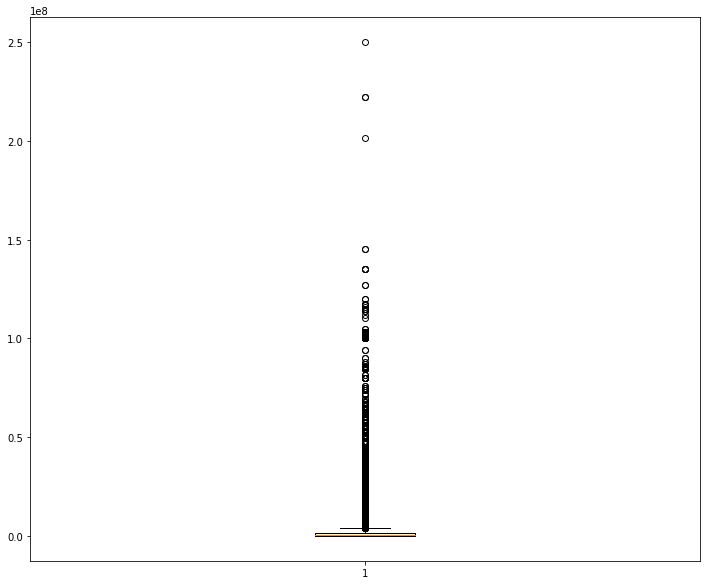

In [ ]:
# boxplot for transfer value
graph_size()
plt.boxplot(df['transfer_fee_amnt'])

The boxplot for transfer fee is very similar to transfer valuations for the exact same reason.

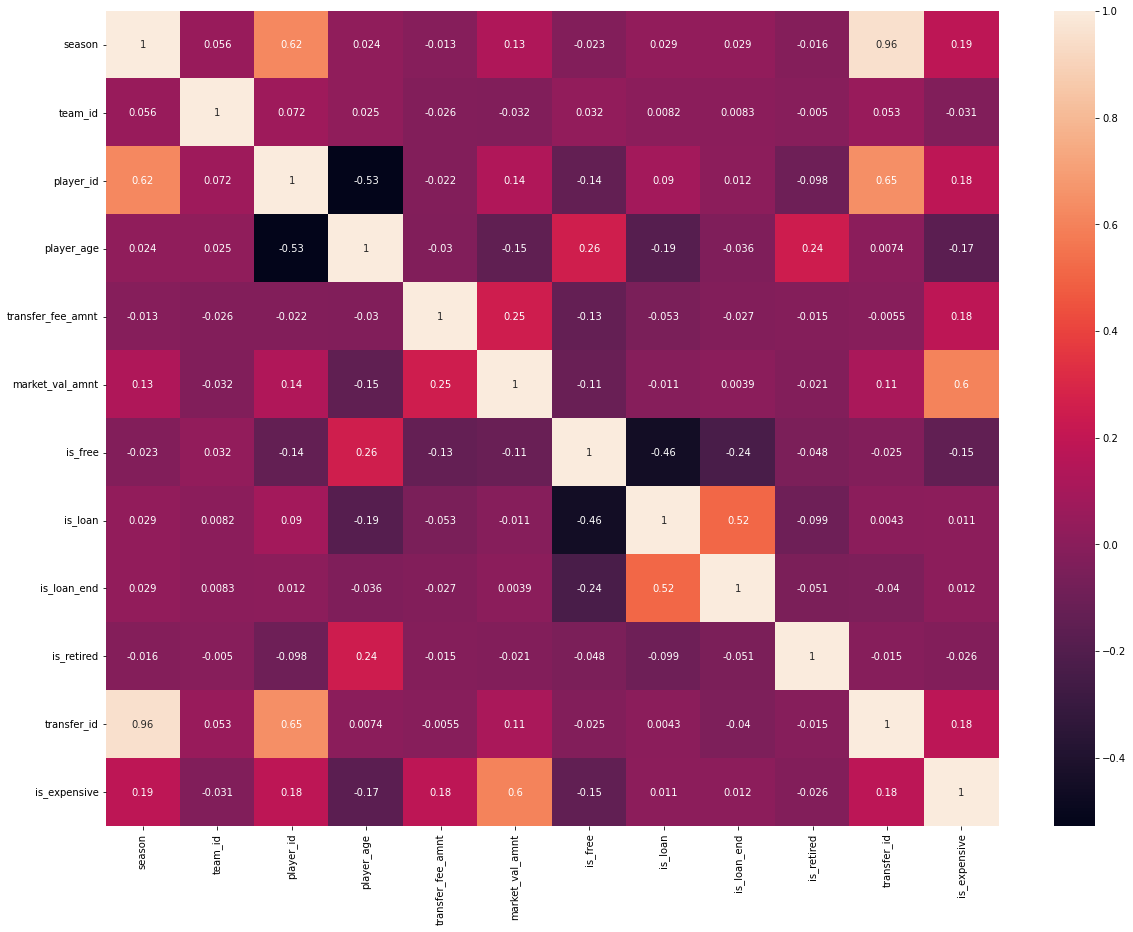

In [ ]:
# heatmap
graph_size(20,15)
sns.heatmap(df.corr(),annot = True)

* An interesting high correlation between player id and season. But we would have dropped player id as it does not have a reasonable input for to predict our response variable.
* Transfer id and season have a high correlation with each other. However like the previous feature we would be dropping this feature as it is just a indentifaction variable for the site(Transfermarkrt) that collected this data.
* is_retired has a medium correlation with player age but that it reasonable.
* We would not be using both transfer fee amount and transfer value in our model as the assumption would be that they are unknown.

In [ ]:
#find out the mean spending grouped by each league
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.groupby(['league'])['transfer_fee_amnt'].mean().sort_values(ascending=False).head(20)


league
GB1   3592912.85727
ES1   2783556.02022
IT1   2696422.01242
FR1   2434497.49970
L1    2234183.02857
PO1   1711487.36925
NL1   1443538.21510
Name: transfer_fee_amnt, dtype: float64

The english league spends the highest per player followed by spain and Italy. The dutch league(NL1) has the lowest mean spending of all the major European leagues.

In [ ]:
#find out the mean transfer value grouped by each position of the player(outfield and goalie)
df.groupby(['player_pos'])['transfer_fee_amnt'].mean().sort_values(ascending=False).head(20)


player_pos
midfield   5753300.85470
attack     4453869.56522
SS         3685516.32653
CF         2817326.24574
AM         2720716.46809
RW         2707344.15529
LW         2677019.80831
CM         2583651.65547
CB         2517727.87284
DM         2392094.17510
RB         2207509.77444
defence    2091848.27586
LB         2076564.90803
LM         2021632.92181
RM         1836078.70968
GK         1546492.02610
Name: transfer_fee_amnt, dtype: float64

It is facinating to see that clubs are more likely to spend higher on average to get midfielders compared to forwards(attack).

In [ ]:
#find out how transfer fee is affected by the type of buying club
df.groupby(['team_name'])['transfer_fee_amnt'].mean().sort_values(ascending=False).head(20)

team_name
FC Barcelona              9942656.70732
Real Madrid               9290523.80952
AS Bari                   8659248.43750
Naval 1º de Maio          8259155.17241
Manchester United         6714809.52381
Borussia Dortmund         6363347.43590
Atlético de Madrid        5917238.80597
Bayern Munich             5746105.30612
Arsenal FC                5737836.79654
Paris Saint-Germain       5655288.48168
Liverpool FC              5545153.34686
Chelsea FC                5514080.42895
Manchester City           5296486.85897
RB Leipzig                5098491.22807
Wolverhampton Wanderers   4954311.34565
Birmingham City           4913016.16162
FC Internazionale         4845900.00000
Southampton FC            4811810.22727
Olympique Lyon            4678441.69014
Juventus FC               4363311.33501
Name: transfer_fee_amnt, dtype: float64

Bacelona has the highest average net spend followed by Real Madrid which is not at all suprising. It is however quite odd to note that AS Bari and Navel de Maio are placed so high up even though they have not been in the tier 1 league of their respective countries for some time now. It is entirely possible that they have only 1 or 2 recorded transfers in the whole dataset which were high in value.

#**Investigative Analysis & Results**

##**Dimensionality reduction**

In [ ]:
#drop team id, player id, transfer id since they were filler columns made by the data collection site
df.drop(['team_id','player_id','transfer_id'],axis = 1, inplace = True)
#drop loan ended due to high correlinearity with the attribute is_loan, and they also explain the same process 
df.drop(['is_loan_end'],axis = 1, inplace = True)

##**Data scaling**

In [13]:
# apply minmax scaler to numeric columns
# transform season ,player_age, transfer_fee_amnt, and market_val_amnt column.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ['season' ,'player_age', 'transfer_fee_amnt','market_val_amnt'	]
for col in cols:
  df[col] = scaler.fit_transform(df[col].to_numpy().reshape(-1,1))

df.head()

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,player_nation,player_pos,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id,is_expensive
0,GB1,0.0,s,985.0,Manchester United,England,in,33544.0,Antonio Valencia,0.34375,Ecuador,RB,1071,Wigan Athletic,England,0.07520,0.002750,False,False,False,False,310832.0,0
1,GB1,0.0,s,985.0,Manchester United,England,in,62049.0,Mame Diouf,0.28125,Senegal,CF,687,Molde FK,Norway,0.01800,0.009938,False,False,False,False,319841.0,0
2,GB1,0.0,s,985.0,Manchester United,England,in,43261.0,Gabriel Obertan,0.25000,France,AM,40,FC Girondins Bordeaux,France,0.01600,0.002438,False,False,False,False,315185.0,0
3,GB1,0.0,s,985.0,Manchester United,England,in,1397.0,Michael Owen,0.53125,England,CF,762,Newcastle United,England,0.00000,0.003219,True,False,False,False,306421.0,0
4,GB1,0.0,s,985.0,Manchester United,England,in,73538.0,Scott Moffatt,0.18750,England,CB,5242,Manchester United U18,England,0.00408,0.001813,False,False,False,False,339015.0,0


In [ ]:
df.shape

(69970, 19)

In [ ]:
from scipy import stats

#perform chi-square test
target=df['is_expensive'].reset_index(drop=True).copy()
chi_sq=[]
for i in range(0,19):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(target, df.iloc[:,i]))[0:2],i])
#chi_sq
chi_sq.sort(reverse=True)
chi_sq

[[(31385.210785311658, 0.0), 6],
 [(13420.388276682932, 0.0), 14],
 [(10282.97571596667, 0.0), 18],
 [(6040.557700203247, 3.1518372903929014e-259), 13],
 [(5480.868522973314, 1.3913018223738175e-81), 11],
 [(5087.534842718756, 3.607499810244382e-75), 10],
 [(3837.170428188727, 0.0), 3],
 [(2386.2793548933128, 0.0), 1],
 [(881.5723348878364, 3.6173975226835473e-187), 4],
 [(881.5723348878363, 3.617397522683753e-187), 0],
 [(745.0622942022073, 6.3837588277825235e-74), 8],
 [(604.0273628649704, 3.2417342453357154e-64), 12],
 [(390.42222085504915, 1.5680194181432652e-59), 7],
 [(273.8911617203827, 1.61016186579778e-61), 15],
 [(77.17640185789494, 2.284217569178774e-10), 9],
 [(36.01128983691709, 1.9617757692976283e-09), 5],
 [(7.45157308477986, 0.006338103204801083), 17],
 [(5.071504271173341, 0.0243222682112187), 2],
 [(3.679276356867687, 0.05509275621785814), 16]]

In [ ]:
# check the types
df.dtypes

league                   object
season                  float64
window                   object
team_name                object
team_country             object
dir                      object
player_name              object
player_age              float64
player_nation            object
player_pos               object
counter_team_id          object
counter_team_name        object
counter_team_country     object
transfer_fee_amnt       float64
market_val_amnt         float64
is_free                    bool
is_loan                    bool
is_retired                 bool
is_expensive              int64
dtype: object

In [14]:
# turn categorical into numeric by using labelencoder
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['league']=lb.fit_transform(df['league'])
df['window']=lb.fit_transform(df['window'])
df['team_name']=lb.fit_transform(df['team_name'])
df['team_country']=lb.fit_transform(df['team_country'])
df['player_nation']=lb.fit_transform(df['player_nation'])
df['dir']=lb.fit_transform(df['dir'])
df['player_name']=lb.fit_transform(df['player_name'])
df['player_pos']=lb.fit_transform(df['player_pos'])
df['counter_team_id']=lb.fit_transform(df['counter_team_id'])
df['counter_team_name']=lb.fit_transform(df['counter_team_name'])
df['counter_team_country']=lb.fit_transform(df['counter_team_country'])


In [ ]:
df.head()

,league,season,window,team_name,team_country,dir,player_name,player_age,player_nation,player_pos,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_retired,is_expensive
0,2,0.00000,0,137,0,0,1478,0.34375,45,9,109,3540,35,0.07520,0.00275,False,False,False,0
1,2,0.00000,0,137,0,0,10033,0.28125,135,2,2826,2224,83,0.01800,0.00994,False,False,False,0
2,2,0.00000,0,137,0,0,5587,0.25000,54,0,2051,1343,38,0.01600,0.00244,False,False,False,0
3,2,0.00000,0,137,0,0,11323,0.53125,48,2,2978,2330,35,0.00000,0.00322,True,False,False,0
4,2,0.00000,0,137,0,0,14666,0.18750,48,1,2481,2180,35,0.00408,0.00181,False,False,False,0


In [15]:
#we use min max scaler to normalize the dataframe
from sklearn.preprocessing import MinMaxScaler

cols = df.columns
scaler = MinMaxScaler()
for col in cols:
    df[col] = scaler.fit_transform(df[col].to_numpy().reshape(-1, 1))
df.head()

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,player_nation,player_pos,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id,is_expensive
0,0.333333,0.0,0.0,0.041261,0.566116,0.0,0.0,0.035797,0.086428,0.34375,0.269461,0.600000,0.032469,0.981153,0.282258,0.07520,0.002750,0.0,0.0,0.0,0.0,0.067994,0.0
1,0.333333,0.0,0.0,0.041261,0.566116,0.0,0.0,0.066222,0.586691,0.28125,0.808383,0.133333,0.841823,0.616408,0.669355,0.01800,0.009938,0.0,0.0,0.0,0.0,0.070521,0.0
2,0.333333,0.0,0.0,0.041261,0.566116,0.0,0.0,0.046169,0.326706,0.25000,0.323353,0.000000,0.610962,0.372228,0.306452,0.01600,0.002438,0.0,0.0,0.0,0.0,0.069215,0.0
3,0.333333,0.0,0.0,0.041261,0.566116,0.0,0.0,0.001485,0.662125,0.53125,0.287425,0.133333,0.887102,0.645787,0.282258,0.00000,0.003219,1.0,0.0,0.0,0.0,0.066757,0.0
4,0.333333,0.0,0.0,0.041261,0.566116,0.0,0.0,0.078485,0.857611,0.18750,0.287425,0.066667,0.739053,0.604213,0.282258,0.00408,0.001813,0.0,0.0,0.0,0.0,0.075900,0.0


##**Feature Selection**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# select k best
#importing libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#declaring target as Total Users column
target = df['is_expensive']
#dropping Total Users from the features
features = df.drop(['is_expensive','market_val_amnt','transfer_fee_amnt','dir','is_free','is_retired'],axis = 1).copy()
#fitting the columns into their respective positions
select_kbest = SelectKBest(f_regression,k = 6).fit(features,target)
features_kbest = select_kbest.get_support()
#printing results from kbest
print('chosen features: ', features.columns[features_kbest],'\n')

select_kbest.scores_

chosen features:  Index(['league', 'season', 'window', 'team_country', 'player_age',
       'counter_team_country'],
      dtype='object') 



array([5.51040775e+02, 2.54290078e+03, 3.46665393e+01, 7.48863867e+00,
       3.45871980e+02, 1.39703120e+00, 1.99113550e+03, 1.14837487e+01,
       1.06093112e+01, 7.12132600e+00, 8.69828227e+00, 1.74653113e+02,
       9.21473847e+00])

Very interesting to see the features that are outputted here. I would have normally expected to see player position or the counter team name(the team that is selling the player) to be included.

In [ ]:
# Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(estimator = lr, n_features_to_select = 5 , step = 1)

rfe.fit(features,target)
rfe_features = features.columns[rfe.support_]
print(rfe_features)

Index(['league', 'season', 'team_country', 'player_age', 'is_loan'], dtype='object')


##**SMOTE**

We decided to do a hybrid type of selection where we take a few features that were returned from the feature selection algorithms from above and use our domain knowledge to select the rest:
* We think the position of player is crucial in determining a player's valuation which in turn decides if he is expensive or not.
* We also decided to select the selling team(counter_team_name) as a feature since they would definately play a vital role in deciding their players' valuation based on the type of contract the player in on.

In [16]:
#SMOTE the data since there is too many cases of not_expensive players and few expensive players in comparison
from imblearn.over_sampling import SMOTE

y = df['is_expensive']
#declaring the features
X = df[['league','season','player_age','player_pos','player_nation','counter_team_name']]
#our test and train split for prediction
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

X_train.shape, y_train.shape

((90990, 6), (90990,))

We tried fitting the data without balancing it but the results in recall when we did our performance metrics using the classification report were terrible. It is paramount that we balance this dataset to see improvements in those metrics.

##**Classifier models**

###**Support Vector Classifier and metrics**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import svm
#instance for our svc
clf = svm.SVC()
#fitting our model
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.score(X,y)

0.6597113048449336

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.64      0.75     11376
         1.0       0.32      0.74      0.45      2618

    accuracy                           0.66     13994
   macro avg       0.62      0.69      0.60     13994
weighted avg       0.80      0.66      0.69     13994



In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
test_conf_mat = confusion_matrix(y_test, y_pred)
#print results 
test_conf_mat

array([[7266, 4110],
       [ 688, 1930]])

In [ ]:
# print roc score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('auc score:', auc)

auc score: 0.6879585263334332


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


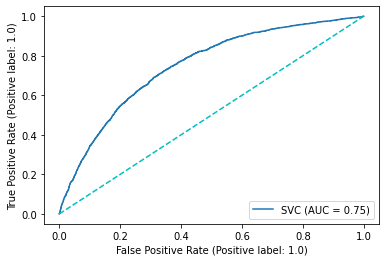

In [ ]:
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.plot([0, 1], [0, 1], 'c--', label = 'support vector classifier');
plt.show()

###**Random Forest Classifier and metrics**

In [ ]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestClassifier()
model = forest.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X,y)

0.9697298842361012

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92     11376
         1.0       0.67      0.50      0.57      2618

    accuracy                           0.86     13994
   macro avg       0.78      0.72      0.74     13994
weighted avg       0.85      0.86      0.85     13994



In [ ]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
test_conf_mat = confusion_matrix(y_test, y_pred)
#print results 
test_conf_mat

array([[10746,   630],
       [ 1314,  1304]])

In [ ]:
# print roc score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('auc score:', auc)

auc score: 0.7213551991567629


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


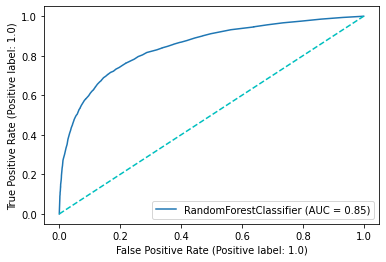

In [ ]:
metrics.plot_roc_curve(forest, X_test, y_test) 
plt.plot([0, 1], [0, 1], 'c--', label = 'random forest classifier');
plt.show()

##**Decision Tree Classifier and metrics**

In [ ]:
# decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=15)
model = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
dtree.score(X,y)

0.7160783192796913

In [ ]:
#  print classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.88      0.74      0.81     11376
         1.0       0.34      0.56      0.42      2618

    accuracy                           0.71     13994
   macro avg       0.61      0.65      0.61     13994
weighted avg       0.78      0.71      0.73     13994



In [ ]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
test_conf_mat = confusion_matrix(y_test, y_pred)
#print results 
test_conf_mat

array([[8458, 2918],
       [1143, 1475]])

In [ ]:
# print roc score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('auc score:', auc)

auc score: 0.6534511292050383


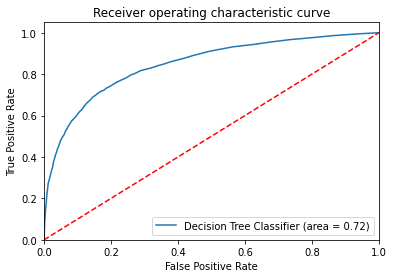

In [ ]:
#referred from M_Fried_M8_assn notebook
# create roc graph
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, forest.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, forest.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 

###**Gaussian Naive Bayes**

In [ ]:
# naive bayes model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X,y)

0.6081320565956838

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.59      0.71     11376
         1.0       0.29      0.73      0.41      2618

    accuracy                           0.61     13994
   macro avg       0.60      0.66      0.56     13994
weighted avg       0.79      0.61      0.66     13994



In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
test_conf_mat = confusion_matrix(y_test, y_pred)
#print results 
test_conf_mat

array([[6692, 4684],
       [ 716, 1902]])

In [ ]:
# print roc score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('auc score:', auc)

auc score: 0.6573823814143993


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


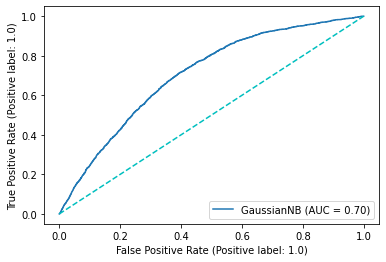

In [ ]:
metrics.plot_roc_curve(gnb, X_test, y_test) 
plt.plot([0, 1], [0, 1], 'c--', label = 'naive classifier');
plt.show()

###**Logistic Regression and Metrics**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X,y)

0.6484064599113906

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.64      0.75     11364
         1.0       0.30      0.68      0.42      2630

    accuracy                           0.65     13994
   macro avg       0.60      0.66      0.58     13994
weighted avg       0.78      0.65      0.68     13994



In [20]:
# confusion matrix
from sklearn.metrics import confusion_matrix
test_conf_mat = confusion_matrix(y_test, y_pred)
#print results 
test_conf_mat

array([[7275, 4089],
       [ 852, 1778]])

In [21]:
# print roc score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('auc score:', auc)

auc score: 0.6581125708159847


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


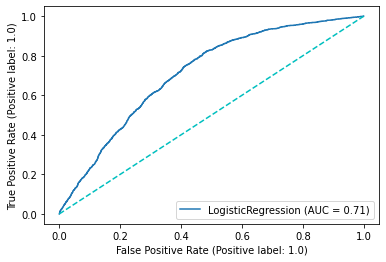

In [23]:
metrics.plot_roc_curve(logreg, X_test, y_test) 
plt.plot([0, 1], [0, 1], 'c--', label = 'logistic regression');
plt.show()

#**Conclusion**

* Our project began with issues finding a dataset until we ultimately landed on one our group member was passionate about. Which is how we landed upon the football transfer dataset. Working with this dataset turned out to create some issues, the response variable we wanted to work with had a lot of NaN values. At this point we had to make a decision, we use our domain knowledge to drop all the rows that had NaN variables where the transfer market fee was NaN's because from our domain knowledge we knew a lot of clubs do not disclose their player transfer details including the fee. However, this would have severely cut our dataset by more than 60% which is why we came upon the decision to use KNN imputer to fill the NaN values. This strategy was successful because the rows were grouped by the club which bought the players "team_name". We did this because the rows are sorted by club which meant we can look to our neighbors to fill the NaN values which are relevant and would give us the most accurate evaluations. 

* With our new data frame we began Exploratory Data Analysis, we gained a lot of information from univariate and multivariate graphs. At this point, we created a new column to our data frame that would determine whether a player was considered expensive or not. The threshold for determining whether they were expensive was the mean of "market_val_amt" if they were lower than the mean they were not considered expensive however if they were over it they were categorized as expensive.  With the new column, we did data scaling to normalize our data.

* We trained the data frame without balancing the data first(response variable) however it resulted in extremely bad scores for f1, recall, and precision for our true values (1). As a result, we looked into SMOTE to balance our data, and then we began to write our four models (SVC, Random Forest Classifier, Gaussian Naive Bayes, Decision Tree Model) and then we compared the results of the models by classification report and the ROC Curve.

* Ultimately we decided that the ensemble model, Random Forest Classifier was the best out of the four we made based on the Model Score, the curve of the ROC Score, and the f1-score.

* **Issues we encountered:** A couple of issues we encountered were that KNN imputer took 5 minutes to run and SVC took 15 minutes. This made working on our project extremely time-consuming. 

* **Result of Research Question:**  We were also able to answer our hypothesis and we came to realize it was wrong. England on an average did not have the highest market value for their players but rather France did. This could be explained due to recent world cup winnings in 2018 which might have inflated the evaluations of the French player base. France was closely followed by Italy and then Spain.